# <center>TCGA-LUAD</center>

## Abstract 

## Main Code

In [15]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# models tried
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import Perceptron

In [2]:
# Opening the dataset
df = pd.read_table("processed_squamous.txt", sep=" ")
y = df.label
X = df.drop('label', axis=1) #iloc[:,list(range(df.shape[1]-1))]
# features in columns and samples in rows.

In [3]:
print(df.shape)
print(X.shape)
print(y.shape)
y.describe()

(551, 917)
(551, 916)
(551,)


count       551
unique        2
top       tumor
freq        502
Name: label, dtype: object

In [4]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(440, 916)
(440,)
(111, 916)
(111,)


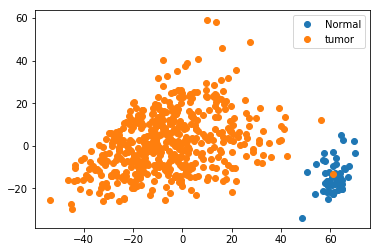

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:,0],X_pca[:,1])

df2 = pd.DataFrame(dict(x=X_pca[:,0], y=X_pca[:,1], label=y))

groups = df2.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [5]:
def try_model(model):
    clf_model = model
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    print('Model:', str(model).split('(')[0])
    print('Model parameters:', str(model))
    print('confusion matrix', confusion_matrix(y_test,y_pred), sep='\n')
    print(classification_report(y_test,y_pred))
    print('accuracy score =', accuracy_score(y_test,y_pred))
    print()

### Model #1: SVM

In [6]:
# SVM model (building the model [Linear])
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
# testing the model
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 10   0]
 [  1 100]]
              precision    recall  f1-score   support

      Normal       0.91      1.00      0.95        10
       tumor       1.00      0.99      1.00       101

   micro avg       0.99      0.99      0.99       111
   macro avg       0.95      1.00      0.97       111
weighted avg       0.99      0.99      0.99       111

0.990990990990991


In [7]:
# GridSearch
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
# {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = GridSearchCV(svclassifier, parameters)
grid.fit(X_train, y_train)
print(grid.best_params_)
print()
print(grid.best_estimator_) 
y_pred_2 = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))
print(accuracy_score(y_test,y_pred_2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[  8   2]
 [  1 100]]
              precision    recall  f1-score   support

      Normal       0.89      0.80      0.84        10
       tumor       0.98      0.99      0.99       101

   micro avg       0.97      0.97      0.97       111
   macro avg       0.93      0.90      0.91       111
weighted avg       0.97      0.97      0.97       111

0.972972972972973


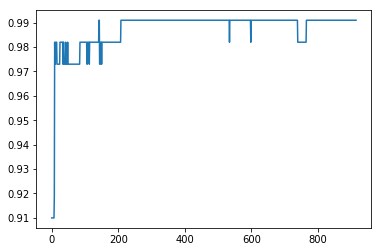

In [9]:
# No. of features vs. accuracy
acc_list = []
for i in range(1, df.shape[1]-1):
    X = df.iloc[:,list(range(i))]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    svc = SVC(kernel='linear')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(acc_list)
plt.show()

### Model #2: Linear Discriminant Analysis

In [38]:
param = {'solver' : ['svd','lsqr']}
lda = LinearDiscriminantAnalysis()

# building a basic model
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print()


# performing grid search analysis of the model
grid = GridSearchCV(lda, param)
grid.fit(X_train, y_train)
print(grid.best_params_)
print()
print(grid.best_estimator_) 
y_pred_2 = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))
print(accuracy_score(y_test,y_pred_2))


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[ 9  1]
 [ 2 99]]
              precision    recall  f1-score   support

      Normal       0.82      0.90      0.86        10
       tumor       0.99      0.98      0.99       101

   micro avg       0.97      0.97      0.97       111
   macro avg       0.90      0.94      0.92       111
weighted avg       0.97      0.97      0.97       111

0.972972972972973



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


{'solver': 'svd'}

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
[[ 9  1]
 [ 2 99]]
              precision    recall  f1-score   support

      Normal       0.82      0.90      0.86        10
       tumor       0.99      0.98      0.99       101

   micro avg       0.97      0.97      0.97       111
   macro avg       0.90      0.94      0.92       111
weighted avg       0.97      0.97      0.97       111

0.972972972972973


### Model #3: Logistic Regression

In [50]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print()

[[ 10   0]
 [  1 100]]
              precision    recall  f1-score   support

      Normal       0.91      1.00      0.95        10
       tumor       1.00      0.99      1.00       101

   micro avg       0.99      0.99      0.99       111
   macro avg       0.95      1.00      0.97       111
weighted avg       0.99      0.99      0.99       111

0.990990990990991



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model #4: Naive Bayes

In [53]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print()

[[  7   3]
 [  0 101]]
              precision    recall  f1-score   support

      Normal       1.00      0.70      0.82        10
       tumor       0.97      1.00      0.99       101

   micro avg       0.97      0.97      0.97       111
   macro avg       0.99      0.85      0.90       111
weighted avg       0.97      0.97      0.97       111

0.972972972972973



In [56]:
try_model(GaussianNB())

[[  7   3]
 [  0 101]]
              precision    recall  f1-score   support

      Normal       1.00      0.70      0.82        10
       tumor       0.97      1.00      0.99       101

   micro avg       0.97      0.97      0.97       111
   macro avg       0.99      0.85      0.90       111
weighted avg       0.97      0.97      0.97       111

0.972972972972973



### Model #5: Decision Tree Classifier

In [62]:
try_model(DecisionTreeClassifier())

Model: DecisionTreeClassifier
Model parameters: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
confusion matrix
[[10  0]
 [ 2 99]]
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.91        10
       tumor       1.00      0.98      0.99       101

   micro avg       0.98      0.98      0.98       111
   macro avg       0.92      0.99      0.95       111
weighted avg       0.98      0.98      0.98       111

accuracy score 0.9819819819819819



[[10  0]
 [ 2 99]]
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.91        10
       tumor       1.00      0.98      0.99       101

    accuracy                           0.98       111
   macro avg       0.92      0.99      0.95       111
weighted avg       0.98      0.98      0.98       111

0.9819819819819819
1



[Text(167.4, 163.07999999999998, 'X[13] <= 13.988\ngini = 0.162\nsamples = 440\nvalue = [39, 401]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 401\nvalue = [0, 401]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]')]

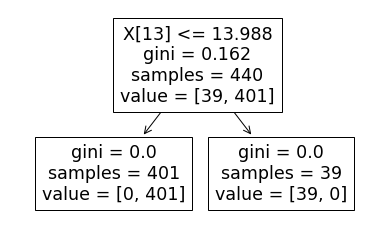

In [14]:
DTC = DecisionTreeClassifier()
dtc = DTC.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(dtc.n_outputs_)
print()
plot_tree(dtc)

### Model #6: Perceptron

In [16]:
clf = Perceptron()
clf.fit(X, y)
clf.score(X, y)

0.9981851179673321

In [17]:
try_model(Perceptron())

Model: Perceptron
Model parameters: Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
confusion matrix
[[10  0]
 [ 2 99]]
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.91        10
       tumor       1.00      0.98      0.99       101

    accuracy                           0.98       111
   macro avg       0.92      0.99      0.95       111
weighted avg       0.98      0.98      0.98       111

accuracy score = 0.9819819819819819



## Results and Discussion